In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from dataset import *
from midi_unit import *
from similarity import *

In [2]:
generator = new_generator(root="../../dataset/newbie-dataset/", slice_duration=3.0, mark_onset=True, shuffle=False)

In [3]:
score_matrix, perf_matrix, (original_head, original_tail) = next(generator)
score_matrix, perf_matrix, (original_head, original_tail) = next(generator)

In [4]:
decay_fn = make_decay_fn("linear", settling_frame=2)
score_seq_list = MIDIUnitSeqList.from_midi_matrix(score_matrix, decay_fn)
perf_seq_list = MIDIUnitSeqList.from_midi_matrix(perf_matrix, decay_fn)

score_sequence = score_seq_list.repr_sequence
perf_sequence = perf_seq_list.repr_sequence
original_sequence = perf_seq_list[original_head:original_tail+1].repr_sequence

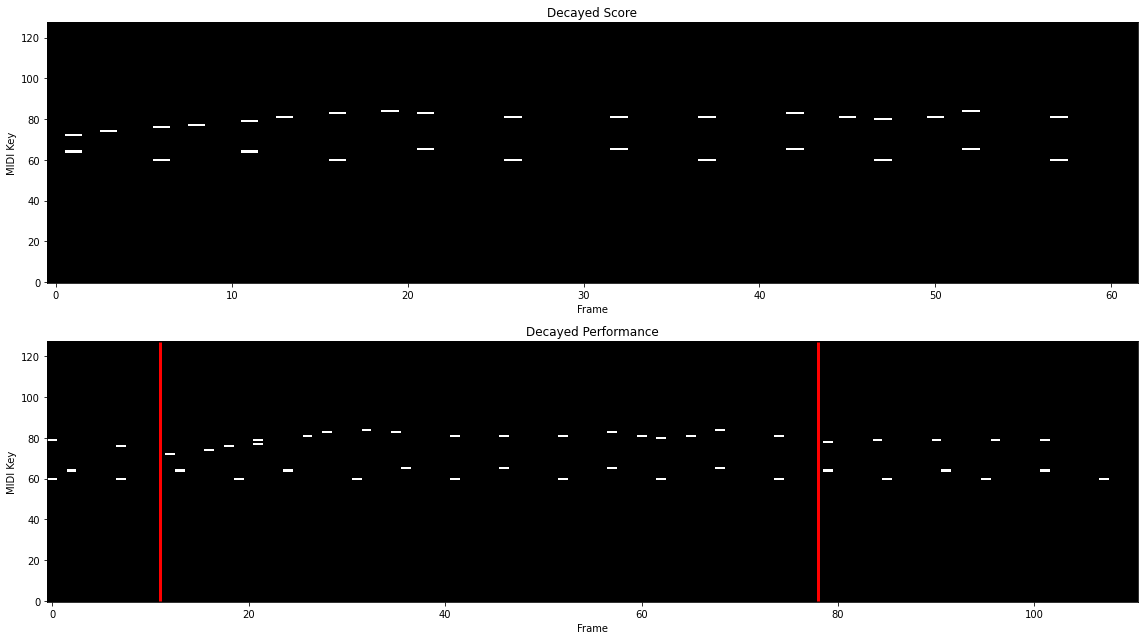

In [5]:
decayed_score_matrix = score_seq_list.to_midi_matrix(set_velocity=True)
decayed_perf_matrix = perf_seq_list.to_midi_matrix(set_velocity=True)

plt.figure(figsize=(16, 9), facecolor="white")
plt.subplot(2, 1, 1)
plt.title("Decayed Score")
plt.imshow(decayed_score_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.subplot(2, 1, 2)
plt.title("Decayed Performance")
plt.imshow(decayed_perf_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.vlines(original_head, 0, MAX_MIDI_KEY, "r", linewidth=3)
plt.vlines(original_tail, 0, MAX_MIDI_KEY, "r", linewidth=3, label="original")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.tight_layout()
plt.show()

In [6]:
original_cost, _, _, original_path = global_dtw(score_sequence, original_sequence)
global_cost, (global_head, global_tail), _, global_path = global_dtw(score_sequence, perf_sequence)
subsequence_cost, (subsequence_head, subsequence_tail), subsequence_matrix, subsequence_path = subsequence_dtw(score_sequence, perf_sequence)

dx, dy = (0.5, 0)
original_path = np.array([(original_head+x+dx, y+dy) for (x, y) in original_path])
global_path = np.array([(x+dx, y+dy) for (x, y) in global_path])
subsequence_path = np.array([(x+dx, y+dy) for (x, y) in subsequence_path])

print(f"{original_cost=:.2f}")
print(f"{global_cost=:.2f}")
print(f"{subsequence_cost=:.2f}")

original_cost=0.09
global_cost=0.22
subsequence_cost=0.09


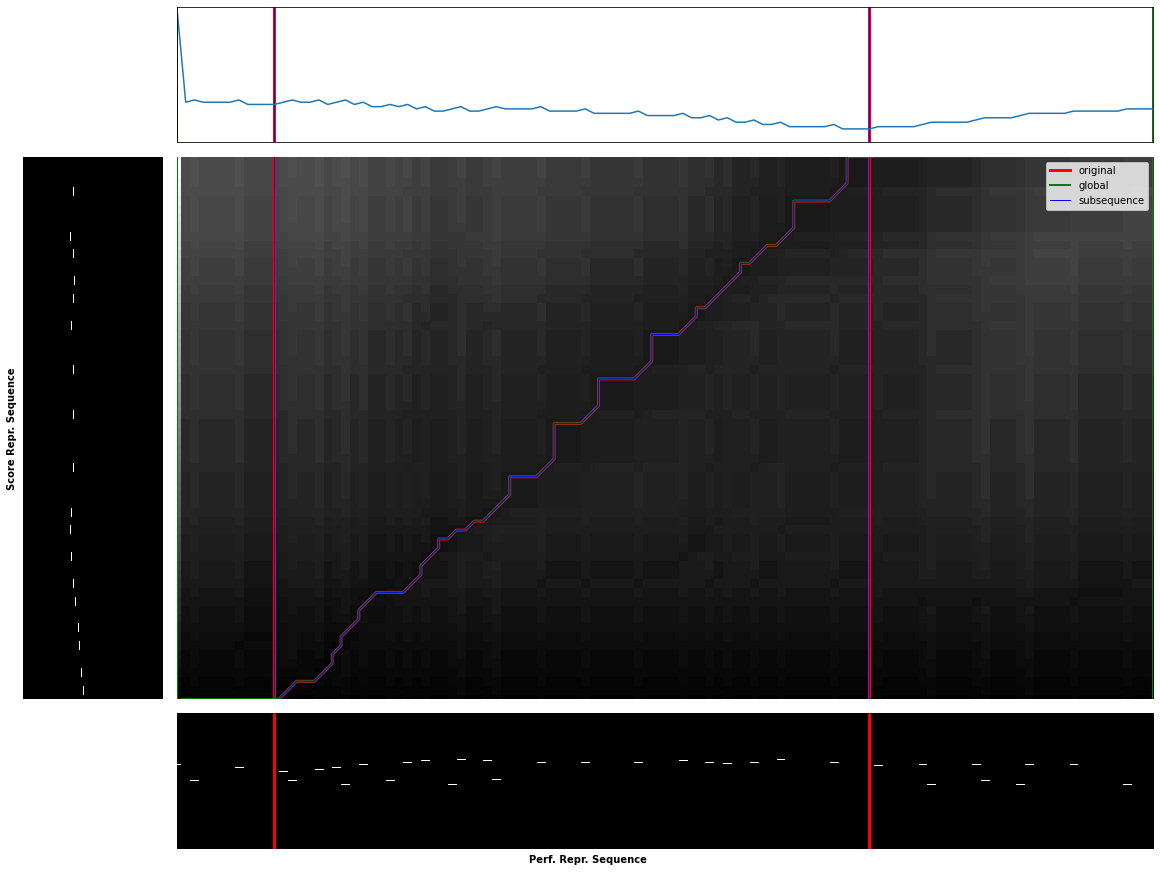

In [7]:

score_sequence_matrix = score_sequence.to_midi_matrix(set_velocity=True)
score_sequence_matrix = np.rot90(score_sequence_matrix, axes=(1, 0))
perf_sequence_matrix = perf_sequence.to_midi_matrix(set_velocity=True)

num_score_frame, num_perf_frame = subsequence_matrix.shape
delta_functions = subsequence_matrix[-1, :]
delta_max = np.max(delta_functions)

fig, axes = plt.subplots(3, 2, gridspec_kw = {"width_ratios": [1, 7], "height_ratios": [1, 4, 1]}, facecolor="white", figsize=(16, 12))
fig.text(0.5, 0, "Perf. Repr. Sequence", ha="center", va="center", fontdict={"weight":"semibold"})
fig.text(0, 0.5, "Score Repr. Sequence", ha="center", va="center", rotation="vertical", fontdict={"weight":"semibold"})

axes[0][0].axis("off")  # hide

axes[0][1].plot(delta_functions)
axes[0][1].vlines(original_head, 0, delta_max, "r", linewidth=3)
axes[0][1].vlines(original_tail, 0, delta_max, "r", linewidth=3)
axes[0][1].vlines(global_head, 0, delta_max, "g", linewidth=2)
axes[0][1].vlines(global_tail, 0, delta_max, "g", linewidth=2)
axes[0][1].vlines(subsequence_head, 0, delta_max, "b", linewidth=1)
axes[0][1].vlines(subsequence_tail, 0, delta_max, "b", linewidth=1)
axes[0][1].set_xlim([0, num_perf_frame - 1])
axes[0][1].set_ylim([0, delta_max])
axes[0][1].xaxis.set_visible(False)
axes[0][1].yaxis.set_visible(False)

axes[1][0].imshow(score_sequence_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
axes[1][0].set_xlim([0, MAX_MIDI_KEY])
axes[1][0].set_ylim([0, num_score_frame - 1])
axes[1][0].axis("off")

axes[1][1].imshow(subsequence_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
axes[1][1].vlines(original_head, 0, num_score_frame, "r", linewidth=3)
axes[1][1].vlines(original_tail, 0, num_score_frame, "r", linewidth=3)
axes[1][1].vlines(global_head, 0, num_score_frame, "g", linewidth=2)
axes[1][1].vlines(global_tail, 0, num_score_frame, "g", linewidth=2)
axes[1][1].vlines(subsequence_head, 0, num_score_frame, "b", linewidth=1)
axes[1][1].vlines(subsequence_tail, 0, num_score_frame, "b", linewidth=1)
axes[1][1].plot(original_path[:, 0], original_path[:, 1], "r", linewidth=3, label="original")
axes[1][1].plot(global_path[:, 0], global_path[:, 1], "g", linewidth=2, label="global")
axes[1][1].plot(subsequence_path[:, 0], subsequence_path[:, 1], "b", linewidth=1, label="subsequence")
axes[1][1].legend()
axes[1][1].set_xlim([0, num_perf_frame - 1])
axes[1][1].set_ylim([0, num_score_frame -1])
axes[1][1].axis("off")

axes[2][0].axis("off")  # hide

axes[2][1].imshow(perf_sequence_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
axes[2][1].vlines(original_head, 0, MAX_MIDI_KEY, "r", linewidth=3)
axes[2][1].vlines(original_tail, 0, MAX_MIDI_KEY, "r", linewidth=3, label="original")
axes[2][1].set_xlim([0, num_perf_frame - 1])
axes[2][1].set_ylim([0, MAX_MIDI_KEY])
axes[2][1].axis("off")

plt.tight_layout()
plt.show()